In [ ]:
import random
from os import path
import pandas as pd
import numpy as np
import glob
from functools import reduce
import ipywidgets 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from PIL import Image

def clean_cols(df):
    for i, columns_old in enumerate(df.columns.levels):
        columns_new = np.where(columns_old.str.contains('Unnamed'), '', columns_old)
        df.rename(columns=dict(zip(columns_old, columns_new)), level=i, inplace=True)

dir = "C:\\Users\\Corey\\"
doc_dir = "C:\\Users\\Corey\\coreyrastello\\docs\\"
map_img = mpimg.imread(rf"{dir}coreyrastello\visualization\assets\pitch.png")


In [3]:
#read it into a dataframe, use the right number of headers and index cols
df = pd.read_csv(rf"{dir}coreyrastello\data\premier-league\AllSeasons\Match Data\epl_shot_data_AllSeasons_Season.csv")

seasons = df['season'].unique()
teams = df['team'].unique()

df['x'] = df['location_x'] * 160
df['y'] = df['location_y'] * 100
df['body_part'] = df['body_part'].fillna('Head')
df['xj'] = df['x'].apply(lambda x: x + random.gauss(0, 1))
df['yj'] = df['y'].apply(lambda x: x + random.gauss(0, 1))
df.head()


,league,season,game,team,player,league_id,season_id,game_id,date,shot_id,...,location_x,location_y,minute,body_part,situation,result,x,y,xj,yj
0,ENG-Premier League,2425,2024-08-16 Manchester United-Fulham,Fulham,Adama Traoré,1,2024,26602,2024-08-16 19:00:00,584627,...,0.867,0.278,7,Right Foot,Open Play,Missed Shot,138.719995,27.799999,138.498399,26.723440
1,ENG-Premier League,2425,2024-08-16 Manchester United-Fulham,Fulham,Adama Traoré,1,2024,26602,2024-08-16 19:00:00,584644,...,0.809,0.512,70,Right Foot,Open Play,Blocked Shot,129.440002,51.200001,130.212310,50.467837
2,ENG-Premier League,2425,2024-08-16 Manchester United-Fulham,Fulham,Adama Traoré,1,2024,26602,2024-08-16 19:00:00,584645,...,0.758,0.361,71,Right Foot,Open Play,Blocked Shot,121.280005,36.099998,120.218025,35.416576
3,ENG-Premier League,2425,2024-08-16 Manchester United-Fulham,Fulham,Alex Iwobi,1,2024,26602,2024-08-16 19:00:00,584636,...,0.962,0.628,47,Head,From Corner,Missed Shot,153.919995,62.799999,154.869554,63.029549
4,ENG-Premier League,2425,2024-08-16 Manchester United-Fulham,Fulham,Calvin Bassey,1,2024,26602,2024-08-16 19:00:00,584646,...,0.823,0.572,75,Left Foot,From Corner,Blocked Shot,131.680005,57.200001,130.773395,56.839149


In [4]:
# Get unique categorical values
results = df['result'].unique()
print(results)
# Create a dictionary to store DataFrames for each value
results_dfs = {value: df[df['result'] == value] for value in results}

# Access individual DataFrames
missed = results_dfs[results[0]] 
blocked = results_dfs[results[1]] 
saved = results_dfs[results[2]] 
goal = results_dfs[results[3]] 
woodwork = results_dfs[results[4]] 
owngoal = results_dfs[results[5]] 

res = {
    "Missed":missed,
    "Blocked":blocked,
    "Saved":saved,
    "Goal":goal,
    "Woodwork":woodwork,
    "Owngoal":owngoal
}

['Missed Shot' 'Blocked Shot' 'Saved Shot' 'Goal' 'Shot On Post'
 'Own Goal']


In [5]:
def shot_chart(df,title=None, **kwargs):
    g = sns.relplot(data=df, x='xj', y='yj', kind='scatter', **kwargs,height=6,aspect=16/9)
    g.set(yticks=[], xticks=[], xlabel=None, ylabel=None)
    if title != None:    
        g.figure.suptitle(title, fontsize=16)
        g.figure.subplots_adjust(top=0.93)
    g.despine(left=True, bottom=True)

    for ax in g.figure.axes:
        ax.imshow(map_img, zorder=0, extent=[0, 160, 0, 100])

    return g

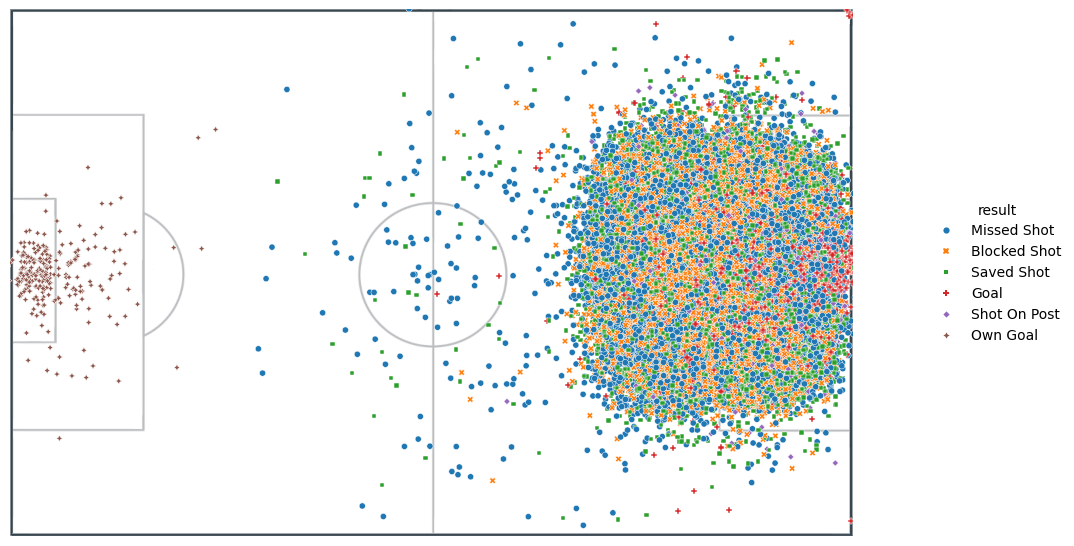

In [6]:
shot_chart(df=df,hue='result',style='result',s=20)

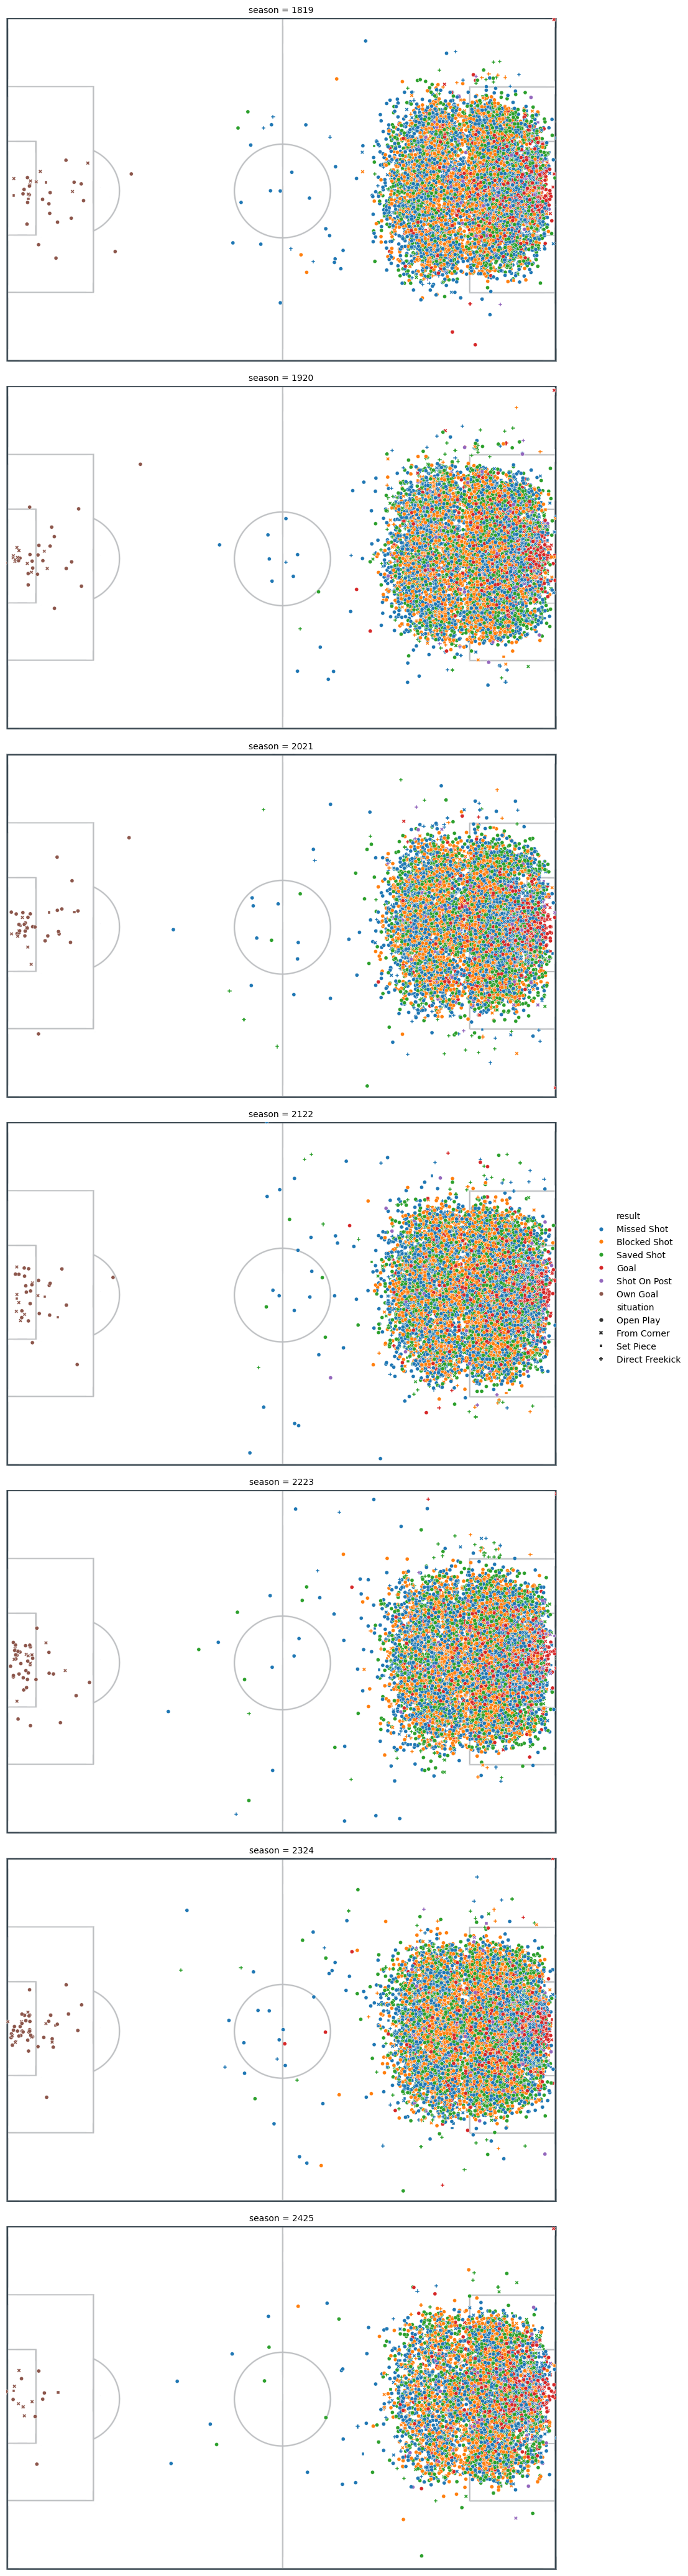

In [7]:
shot_chart(df=df,row='season',hue='result',style='situation',s=20)

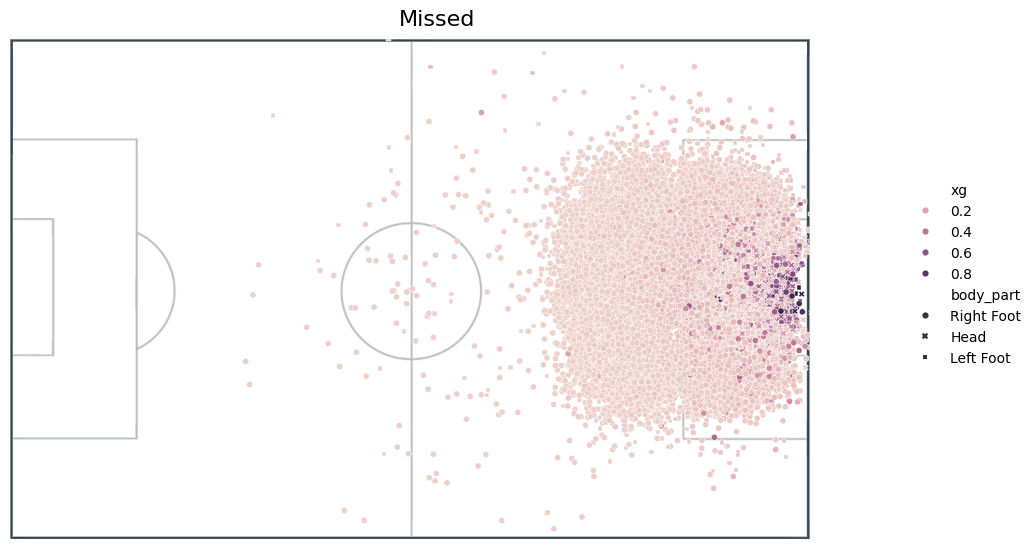

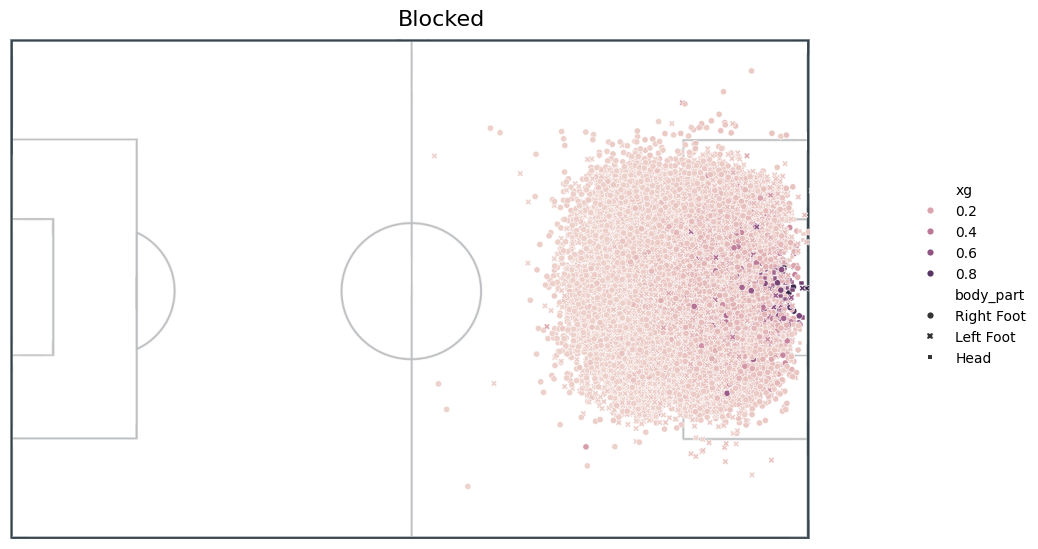

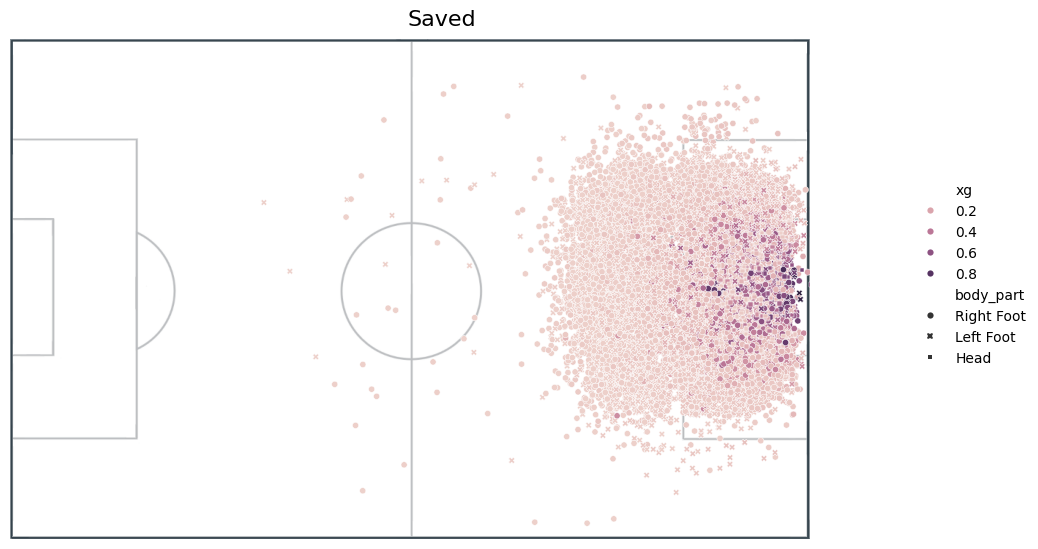

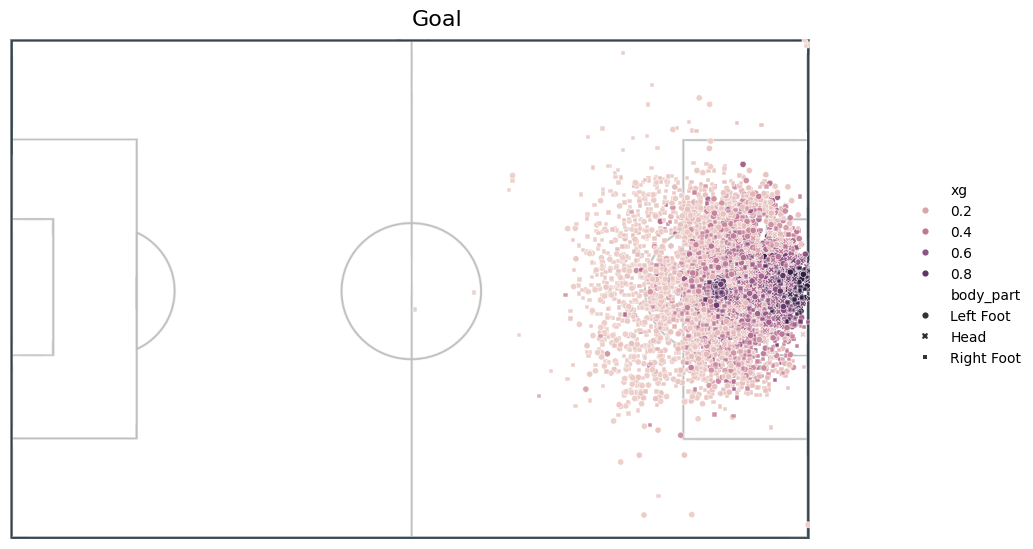

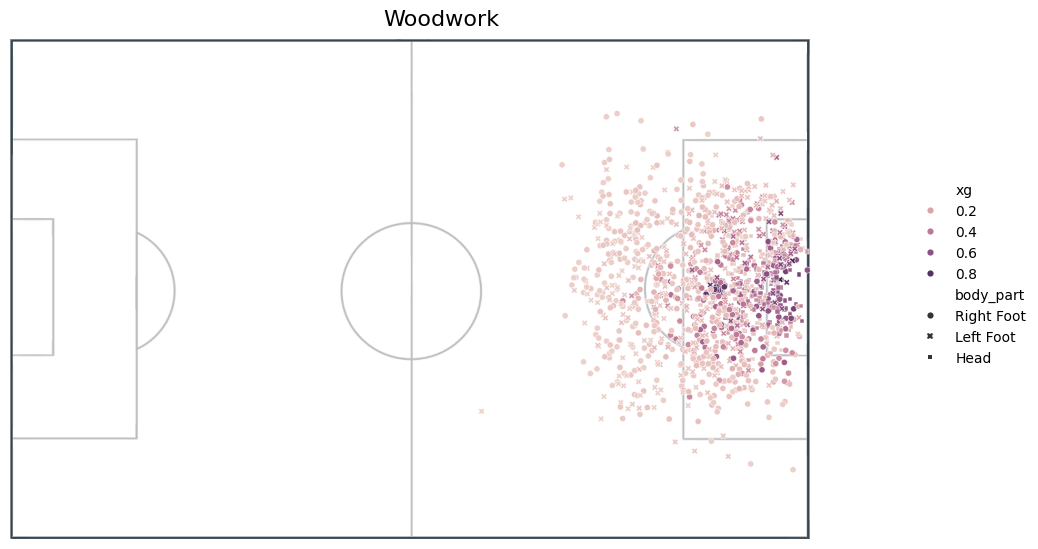

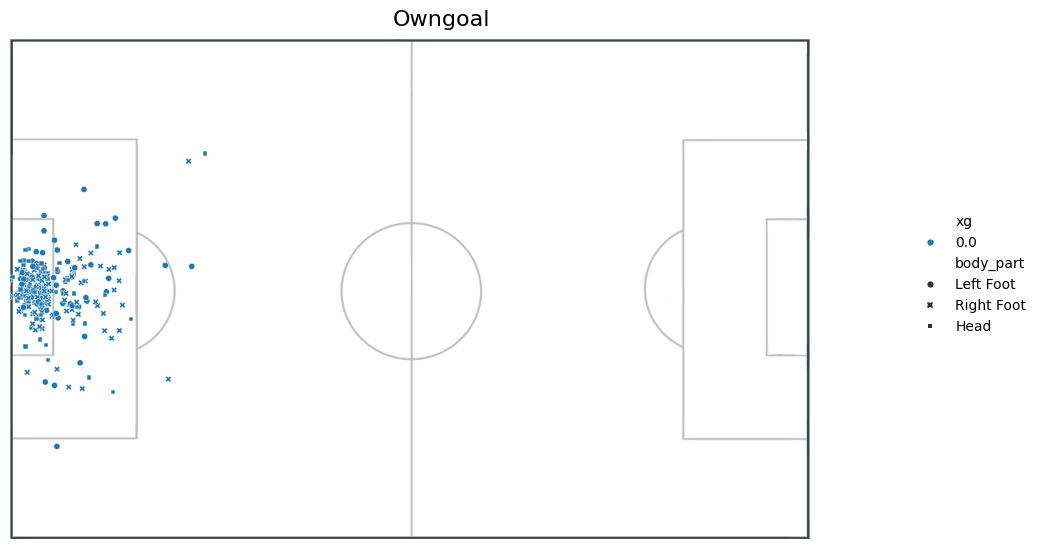

In [8]:
for k,v in res.items():
    shot_chart(df=v,hue='xg',style='body_part',s=20,title=k)

In [9]:
df['xg'].value_counts(normalize=True).sort_index().head(10)

xg
0.000000    0.003915
0.004987    0.000016
0.005215    0.000016
0.005226    0.000016
0.005247    0.000016
0.005306    0.000016
0.005483    0.000016
0.005539    0.000016
0.005583    0.000016
0.005607    0.000016
Name: proportion, dtype: float64

c:\Users\Corey\anaconda3\envs\penv_3_11\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(*plot_args, **plot_kwargs)


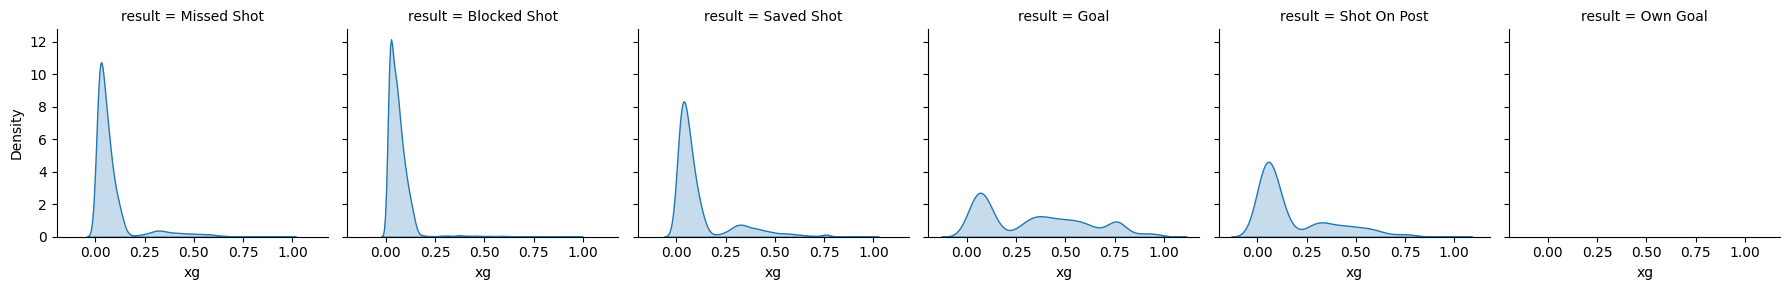

In [10]:
g = (sns.FacetGrid(df,col='result').map(sns.kdeplot,'xg',fill=True))